In [ ]:
!pip install -U FlagEmbedding

In [1]:
import re
import numpy as np
import sys
sys.path.append("..")
from utils.text_preprocessing_for_rag import *

In [2]:
from FlagEmbedding import FlagModel
model = FlagModel('../base/bge_small', query_instruction_for_retrieval="为这个句子生成表示以用于检索相关文章：")

/home/newdisk/jxh/anaconda/envs/sft2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----------using 4*GPUs----------


In [10]:


# 示例文本
text = "青藏高原之后，紧接着是云贵高原、内蒙古高原以及西北内陆地区太阳辐射量较高；而华东、华南地区辐照度较低，最低者便是文章开头提到的四川盆地。\n\n\n\n下面是按照民族和地区对人群肤色进行的分析：普遍规律是：\n\n生活在辐射高地区的人群肤色深\n\n生活在辐射低地区的人群肤色浅\n\n\n\n如果吸收太多紫外线辐射，会让皮肤皱纹增加，变得粗糙、松垂、缺乏弹性。过强紫外线照射还会导致皮肤不均匀地增厚和变薄，常见的阳光引起的皮肤色素变化是雀斑和晒斑，这两者都是长时间暴露在日光下导致的。\n\n\n\n像是海南三亚的太阳紫外线辐射是沈阳的两倍，但三亚男性皮肤老化的风险是沈阳男性的约6倍，女性则达到了惊人的11倍。\n\n\n\n\n\n\n\n\n\n当然了地理君温馨提醒：\n\n以上说的都是普遍性，假如你生活在四川盆地皮肤却很黑，那只能说明你：没做好防晒！\n\n\n气候湿润地区的高颜值“密码”\n\n\n\n除了皮肤颜色外，令人羡慕的优质皮肤还需满足两个条件：一是皮肤的含水量要足够多；二是皮肤出油率要保持较低水平。\n\n\n\n皮肤的含水量跟湿度密切相关，湿度过低，人体皮肤因缺少水分而变得粗糙甚至开裂，人体的免疫系统也会受到伤害，对疾病的抵抗力大大降低甚至丧失；\n\n\n\n而湿度过高时，并且如果长久呆在潮湿空气中，人体皮肤会出现少量细菌感染或者皮肤发痒等现象。所以长时间呆在湿度过高或者过低的环境里都是不利于皮肤的发育。\n\n\n\n\n通常情况下，人体皮肤所需的舒适气温在10~22℃之间，这相当于皮肤所需的舒适湿度在25%~45%之间。\n\n\n\n1月是冬季的典型代表，皮肤最喜欢的相对湿度45%等值线大体沿25°N分布，也就是南岭以南的华南地区。\n\n\n\n\n5月是春季的代表，此时也是全国湿度的舒适范围达到最大的月份，除了东北北部和青藏高原腹地外，全国都在舒适带范围内。\n\n\n\n7月是夏季的代表，“热”字当头，除了东北北部和青藏高原外，全国其它地区都不在舒适带范围内。\n\n\n\n\n以9月、10月为主的秋季，全国舒适带的范围和春季的分布相差无几。\n\n\n\n那么哪个地区相对而言湿度要更大一些呢？\n\n\n\n答案是：川渝地区仍然榜上有名。\n\n\n\n总体上，根据2021年《中国统计年鉴》的数据，西南地区的平均相对湿度更舒适一些，这样的湿度更利于形成或维持水润的皮肤。\n\n\n\n\n\n\n\n\n\n地理君再次温馨提醒：\n\n皮肤适宜的舒适湿度同样具有普遍性，假如你生活在川渝地区皮肤却很干或者皱纹很多，那说明你：有可能是吸烟人群。\n\n图片\n\n\n\n\n\n\n除此以外，由于地域辽阔，自然环境特征复杂多样，普遍性中往往有很多的个例。\n\n\n\n例如，长春的冬季漫长、寒冷干燥，气候条件比很多南方城市还要恶劣，但正是因为冬季严寒，当地人们反而在户外活动的时间变少，防寒保暖的措施更加牢固，因此长春人皮肤的水分状况反而要比江苏、湖南等地的人们的皮肤好。\n\n\n\n吸烟有害健康大家都知道，但是吸烟对皮肤的伤害也很大，甚至超过了阳光带给皮肤的伤害。\n\n\n\n吸烟会导致皮肤的新陈代谢功能降低，易于发生皮肤老化。还会降低人体胶原合成的减少，易于皮肤产生皱纹。\n\n\n\n\n当今社会，中国的平均吸烟率在25%左右，但是男女吸烟率差距极大，男性吸烟率接近50%，女性吸烟率仅3.1%左右。但是15岁以上人群中吸烟者在2018年便超过了总吸烟人数的四分之一。\n\n\n\n一篇发表在《柳叶刀》的文章研究称：我国最喜欢吸烟的人群主要分布在西北地区，比如宁夏银川人吸烟率就高达49.8%。\n\n\n\n而南方一些省市的吸烟率，例如贵州省超过了40%，江浙沪、云南四川等地对烟草的依赖则最低，总体上是北方多于南方。\n\n\n\n\n除了吸烟会影响皮肤状况外，皮肤出油率高、经常爆痘也是其重要影响因素。\n\n\n\n时不时长个痘，难受不？该不该挤呢？\n\n\n\n实话实说，痘痘的发病率是有明显的地域差别。跟人们普遍认知不同的是，南方的爆痘率要明显高于北方。\n\n\n\n华南地区更是长痘的重灾区。这是因为湿度过高、气温炎热的广州、三亚等地，人们的皮脂分泌通常也较旺盛，皮肤相对油腻、容易爆痘。\n\n\n\n那么，全国最不长痘的地方在哪里呢？\n\n\n\n依旧是川渝所在的西南地区，不愧“天府之国”啊！\n\n\n\n不止在爆痘率上，出油率南方也是高于北方地区。北方气候比较冷，空气干燥。皮肤毛孔收缩，保持皮肤的含水量，皮脂腺分泌降低，皮肤内的水分也用来保持皮肤湿润，因此皮肤油脂少。\n\n\n\n而南方空气相较于北方要暖和且空气湿润，因此皮肤新陈代谢快，皮脂腺分泌旺盛，就导致了皮肤容易出油。\n\n\n\n其实出油并不代表皮肤水分充足，恰恰相反，正是由于人体皮肤干燥缺水，导致肌肤受损，人体自我修复和保护系统才会分泌油脂来保护肌肤！所以即使在南方也要做到皮肤及时补水。\n\n\n\n一个地区的人的皮肤状况和自然地理环境有一定联系，而且这种联系也是潜移默化的，但是随着人口流动的增加，导致基因多元化，所以二者联系越来越小"


sentences = split_text_to_sentences(text)


# 打印结果
for item in sentences[:3]:
    idx, sentence, start = item["index"],item['sentence'],item["start_idx"]
    print(f"Sentence {idx+1}")
    print(sentence)
    print("------")
    #print(f"Start Index: {start}")
    print(text[start:start+len(sentence)],"\n")


Sentence 1
青藏高原之后，紧接着是云贵高原、内蒙古高原以及西北内陆地区太阳辐射量较高；而华东、华南地区辐照度较低，最低者便是文章开头提到的四川盆地。
------
青藏高原之后，紧接着是云贵高原、内蒙古高原以及西北内陆地区太阳辐射量较高；而华东、华南地区辐照度较低，最低者便是文章开头提到的四川盆地。 

Sentence 2
下面是按照民族和地区对人群肤色进行的分析：普遍规律是：
------
下面是按照民族和地区对人群肤色进行的分析：普遍规律是： 

Sentence 3
生活在辐射高地区的人群肤色深

------
生活在辐射高地区的人群肤色深
 



In [11]:
sentences = combine_sentences(sentences)
sentences[1]

{'sentence': '下面是按照民族和地区对人群肤色进行的分析：普遍规律是：',
 'index': 1,
 'start_idx': 72,
 'combined_sentence': '青藏高原之后，紧接着是云贵高原、内蒙古高原以及西北内陆地区太阳辐射量较高；而华东、华南地区辐照度较低，最低者便是文章开头提到的四川盆地。 下面是按照民族和地区对人群肤色进行的分析：普遍规律是： 生活在辐射高地区的人群肤色深\n'}

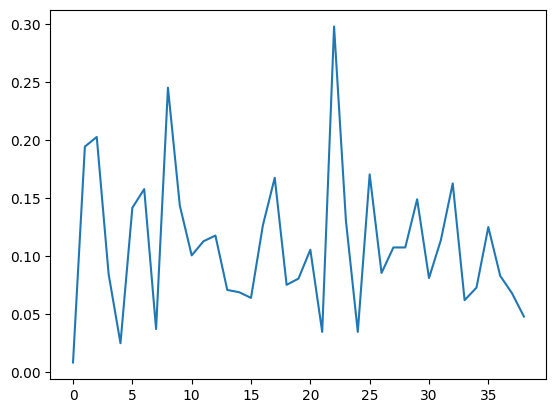

In [12]:
import matplotlib.pyplot as plt
combined_sentence_embeddings = model.encode([x["combined_sentence"] for x in sentences])
distances = calculate_cosine_distances(combined_sentence_embeddings)
plt.plot(distances)

In [13]:
chunks = build_chunks(text,sentences,distances,90)
for i, chunk in enumerate(chunks):
    buffer = 200
    print (f"Chunk #{i}")
    print (chunk["text"].strip())
    print("start_idx:{}".format(chunk["start_idx"]))
    print ("\n")

Chunk #0
青藏高原之后，紧接着是云贵高原、内蒙古高原以及西北内陆地区太阳辐射量较高；而华东、华南地区辐照度较低，最低者便是文章开头提到的四川盆地。



下面是按照民族和地区对人群肤色进行的分析：普遍规律是：
start_idx:0


Chunk #1
生活在辐射高地区的人群肤色深
start_idx:101


Chunk #2
生活在辐射低地区的人群肤色浅



如果吸收太多紫外线辐射，会让皮肤皱纹增加，变得粗糙、松垂、缺乏弹性。过强紫外线照射还会导致皮肤不均匀地增厚和变薄，常见的阳光引起的皮肤色素变化是雀斑和晒斑，这两者都是长时间暴露在日光下导致的。



像是海南三亚的太阳紫外线辐射是沈阳的两倍，但三亚男性皮肤老化的风险是沈阳男性的约6倍，女性则达到了惊人的11倍。









当然了地理君温馨提醒：

以上说的都是普遍性，假如你生活在四川盆地皮肤却很黑，那只能说明你：没做好防晒！


气候湿润地区的高颜值“密码”
start_idx:117


Chunk #3
除了皮肤颜色外，令人羡慕的优质皮肤还需满足两个条件：一是皮肤的含水量要足够多；二是皮肤出油率要保持较低水平。



皮肤的含水量跟湿度密切相关，湿度过低，人体皮肤因缺少水分而变得粗糙甚至开裂，人体的免疫系统也会受到伤害，对疾病的抵抗力大大降低甚至丧失；



而湿度过高时，并且如果长久呆在潮湿空气中，人体皮肤会出现少量细菌感染或者皮肤发痒等现象。所以长时间呆在湿度过高或者过低的环境里都是不利于皮肤的发育。




通常情况下，人体皮肤所需的舒适气温在10~22℃之间，这相当于皮肤所需的舒适湿度在25%~45%之间。



1月是冬季的典型代表，皮肤最喜欢的相对湿度45%等值线大体沿25°N分布，也就是南岭以南的华南地区。




5月是春季的代表，此时也是全国湿度的舒适范围达到最大的月份，除了东北北部和青藏高原腹地外，全国都在舒适带范围内。



7月是夏季的代表，“热”字当头，除了东北北部和青藏高原外，全国其它地区都不在舒适带范围内。




以9月、10月为主的秋季，全国舒适带的范围和春季的分布相差无几。



那么哪个地区相对而言湿度要更大一些呢？



答案是：川渝地区仍然榜上有名。



总体上，根据2021年《中国统计年鉴》的数据，西南地区的平均相对湿度更舒适一些，这样

In [14]:
queries = ["什么地区的人皮肤容易长痘？","吸烟有哪些问题"]
q_embeddings = model.encode_queries(queries)
c_embeddings = model.encode([x["text"] for x in chunks])
for q in q_embeddings:
    scores = [cosine_similarity(q, c) for c in c_embeddings]
    print(scores)

    # 对数组进行排序并获取排序后的索引
    sorted_indices = np.argsort(scores)[::-1]

    ans = []
    chosen_threshold = 0.6
    for idx in sorted_indices:
        if scores[idx]>chosen_threshold:
            ans.append({"start": chunks[idx]["start_idx"],"end": chunks[idx]["start_idx"]+len(chunks[idx]["text"])})
    if len(ans)==0:
        for i in range(len(sorted_indices)):
            if i>=2 or scores[sorted_indices[i]]<0.4: continue
            start_idx = chunks[sorted_indices[i]]["start_idx"]
            ans.append({"start": start_idx ,"end": start_idx+len(chunks[sorted_indices[i]]["text"])})
    
    print(ans)
    for item in ans:
        print(text[item["start"]:item["end"]].strip())
        print("----")

[0.5415, 0.5845, 0.5483, 0.575, 0.6313]
[{'start': 1026, 'end': 2000}]
除此以外，由于地域辽阔，自然环境特征复杂多样，普遍性中往往有很多的个例。



例如，长春的冬季漫长、寒冷干燥，气候条件比很多南方城市还要恶劣，但正是因为冬季严寒，当地人们反而在户外活动的时间变少，防寒保暖的措施更加牢固，因此长春人皮肤的水分状况反而要比江苏、湖南等地的人们的皮肤好。



吸烟有害健康大家都知道，但是吸烟对皮肤的伤害也很大，甚至超过了阳光带给皮肤的伤害。



吸烟会导致皮肤的新陈代谢功能降低，易于发生皮肤老化。还会降低人体胶原合成的减少，易于皮肤产生皱纹。




当今社会，中国的平均吸烟率在25%左右，但是男女吸烟率差距极大，男性吸烟率接近50%，女性吸烟率仅3.1%左右。但是15岁以上人群中吸烟者在2018年便超过了总吸烟人数的四分之一。



一篇发表在《柳叶刀》的文章研究称：我国最喜欢吸烟的人群主要分布在西北地区，比如宁夏银川人吸烟率就高达49.8%。



而南方一些省市的吸烟率，例如贵州省超过了40%，江浙沪、云南四川等地对烟草的依赖则最低，总体上是北方多于南方。




除了吸烟会影响皮肤状况外，皮肤出油率高、经常爆痘也是其重要影响因素。



时不时长个痘，难受不？该不该挤呢？



实话实说，痘痘的发病率是有明显的地域差别。跟人们普遍认知不同的是，南方的爆痘率要明显高于北方。



华南地区更是长痘的重灾区。这是因为湿度过高、气温炎热的广州、三亚等地，人们的皮脂分泌通常也较旺盛，皮肤相对油腻、容易爆痘。



那么，全国最不长痘的地方在哪里呢？



依旧是川渝所在的西南地区，不愧“天府之国”啊！



不止在爆痘率上，出油率南方也是高于北方地区。北方气候比较冷，空气干燥。皮肤毛孔收缩，保持皮肤的含水量，皮脂腺分泌降低，皮肤内的水分也用来保持皮肤湿润，因此皮肤油脂少。



而南方空气相较于北方要暖和且空气湿润，因此皮肤新陈代谢快，皮脂腺分泌旺盛，就导致了皮肤容易出油。



其实出油并不代表皮肤水分充足，恰恰相反，正是由于人体皮肤干燥缺水，导致肌肤受损，人体自我修复和保护系统才会分泌油脂来保护肌肤！所以即使在南方也要做到皮肤及时补水。



一个地区的人的皮肤状况和自然地理环境有一定联系

In [9]:
from FlagEmbedding import FlagModel
model = FlagModel('../base/bge_small', query_instruction_for_retrieval="为这个句子生成表示以用于检索相关文章：")

segment = "aaaaaaaaaaaaaaaaaaaaaaa"

sentences = split_text_to_sentences(segment)
sentences = combine_sentences(sentences)
combined_sentence_embeddings = model.encode([x["combined_sentence"] for x in sentences])
distances = calculate_cosine_distances(combined_sentence_embeddings)
chunks = build_chunks(segment, sentences, distances, 90)

queries = ["aaa"]
q_embeddings = model.encode_queries(queries)
c_embeddings = model.encode([x["text"] for x in chunks])
for q in q_embeddings:
    scores = [cosine_similarity(q, c) for c in c_embeddings]

sorted_indices = np.argsort(scores)[::-1]
ans = []
chosen_threshold = 0.6
for idx in sorted_indices:
    if scores[idx]>chosen_threshold:
        ans.append({"start": chunks[idx]["start_idx"],"end": chunks[idx]["start_idx"]+len(chunks[idx]["text"])})
if len(ans)==0:
    for i in range(len(sorted_indices)):
        if i>=2 or scores[sorted_indices[i]]<0.4: continue
        start_idx = chunks[sorted_indices[i]]["start_idx"]
        ans.append({"start": start_idx ,"end": start_idx+len(chunks[sorted_indices[i]]["text"])})

print(ans)
for item in ans:
    print(segment[item["start"]:item["end"]].strip())
    print("----")
print(segment)

----------using 4*GPUs----------
[{'start': 0, 'end': 23}]
aaaaaaaaaaaaaaaaaaaaaaa
----
aaaaaaaaaaaaaaaaaaaaaaa
